<a href="https://colab.research.google.com/github/hananabid47/Sarcasm-Detection-System/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hello and welcome to this sarcasm detector software by Hanan Abid (347884)


*We will use GRU and LSTM on a dataset from keggle [News Headlines Dataset For Sarcasm Detection](https://kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?select=Sarcasm_Headlines_Dataset_v2.json))*

installing kaggle on colab-->

then upload ur kaggle API (download from account section in kaggle.com)

In [1]:
! pip install kaggle

from google.colab import files 
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hananabid47","key":"f77d23ef209b4d2650e93e8796e52032"}'}

We then copy our API into keggles directory and download the dataset

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection
! unzip news-headlines-dataset-for-sarcasm-detection.zip -d sarcasm

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 132MB/s]
Archive:  news-headlines-dataset-for-sarcasm-detection.zip
  inflating: sarcasm/Sarcasm_Headlines_Dataset.json  
  inflating: sarcasm/Sarcasm_Headlines_Dataset_v2.json  


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
data = pd.read_json("/content/sarcasm/Sarcasm_Headlines_Dataset.json", lines = True)
data2 = pd.read_json("/content/sarcasm/Sarcasm_Headlines_Dataset_v2.json", lines = True)

In [5]:
print(data.head(10) ) 

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   
5  https://www.huffingtonpost.com/entry/advancing...   
6  https://www.huffingtonpost.com/entry/how-meat-...   
7  https://www.huffingtonpost.com/entry/boxed-col...   
8  https://politics.theonion.com/top-snake-handle...   
9  https://www.huffingtonpost.com/entry/fridays-m...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy bir

In [6]:
print (data2.head(10))

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   
5             0                               my white inheritance   
6             0         5 ways to file your taxes with less stress   
7             1  richard branson's global-warming donation near...   
8             1  shadow government getting too large to meet in...   
9             0                 lots of parents know this scenario   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https:

join both versions of dataset to get a bigger training set


```

```



In [7]:
data2 = data2[["article_link","headline", "is_sarcastic"]] # matching formats of both datasets
data = pd.concat([data, data2])
data.reset_index(drop = True, inplace =True)
data.drop(['article_link'], axis= 1, inplace = True) #as we dont need the links


In [9]:
data.head(10)
data.shape # prints shape of dataframe (55328, 2)

(55328, 2)

tokenizing our words in the dataset

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['headline']) # will tokenise all the words in headlines
tokenizer.word_index # will print all the words and their tokens

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'after': 19,
 'this': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'just': 34,
 'all': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'report': 40,
 'into': 41,
 'one': 42,
 'year': 43,
 'have': 44,
 'over': 45,
 'why': 46,
 'area': 47,
 'u': 48,
 'day': 49,
 'donald': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'woman': 54,
 'first': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 'no': 59,
 'get': 60,
 'old': 61,
 'off': 62,
 "trump's": 63,
 'life': 64,
 'people': 65,
 'now': 66,
 'an': 67,
 'obama': 68,
 'house': 69,
 "'": 70,
 'still': 71,
 'white': 72,
 'make': 73,
 'was': 74,
 'back': 75,
 'than': 76,
 'women': 77,
 'down': 78,
 'if': 79,
 'my': 80,
 'i': 81,
 'clinto

In [9]:
total_words = len(tokenizer.word_index)
print("Total unique words in the dataset:", total_words)

Total unique words in the dataset: 30884


In [10]:
def applyToken(s): # function to make tokens for senteces 
  tokens = tokenizer.texts_to_sequences(s)[0] 
  return tokens
  
# creating a new column in data which contains tokens for each headline
data['token'] = [applyToken([x]) for x in data['headline']] 

In [11]:
print(data.head(10) ) 

                                            headline  is_sarcastic  \
0  former versace store clerk sues over secret 'b...             0   
1  the 'roseanne' revival catches up to our thorn...             0   
2  mom starting to fear son's web series closest ...             1   
3  boehner just wants wife to listen, not come up...             1   
4  j.k. rowling wishes snape happy birthday in th...             0   
5                        advancing the world's women             0   
6     the fascinating case for eating lab-grown meat             0   
7  this ceo will send your kids to school, if you...             0   
8  top snake handler leaves sinking huckabee camp...             1   
9  friday's morning email: inside trump's presser...             0   

                                               token  
0  [314, 15932, 642, 3417, 2441, 45, 386, 2721, 1...  
1  [3, 8547, 3508, 2723, 21, 1, 176, 8923, 417, 3...  
2  [144, 764, 1, 929, 1818, 2194, 603, 4800, 222,...  
3  [1556,

In [12]:
data.head(10)
data.shape # prints shape of dataframe (55328, 2)

(55328, 3)

In [13]:
max_len = max([len(x) for x in data['token']])
print(max_len)

152


In [14]:
padded = np.array(pad_sequences(data['token'], maxlen = max_len, padding = 'pre') )

In [15]:
padded

array([[    0,     0,     0, ...,     5,  2722,  8922],
       [    0,     0,     0, ...,   253,     8,  1059],
       [    0,     0,     0, ...,    44,     1, 11334],
       ...,
       [    0,     0,     0, ...,     6,   791,  1833],
       [    0,     0,     0, ...,  2618,   840,  6574],
       [    0,     0,     0, ...,     6,   255,   186]], dtype=int32)

In [16]:
len(padded)

55328

creating a train validation split

In [17]:
split_train = int(0.8* len(padded)) # 0.8 is 80% 
train_x = padded[:split_train] # 80% train data
val_x = padded[split_train:] # 20% validation data
train_y =  data['is_sarcastic'][:split_train] # same with lables
val_y = data['is_sarcastic'][split_train:]


Building a model

adding a layer of embeddings to the words and another layer of GRU

now training the model

In [39]:
from tensorflow.keras import metrics

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words +1, 16,),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
        
metrics = [
    metrics.BinaryAccuracy(name='accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    F1Score()
]


model.compile(loss='binary_crossentropy',optimizer='adam',metrics= metrics)
model.summary()
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(train_x, train_y
                              ,epochs=5, validation_data=(val_x, val_y),verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          494160    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 504,157
Trainable params: 504,157
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1384/1384 [==============================] - 226s 159ms/step - loss: 0.4781 - accuracy: 0.7977 - precisi

ran just for 5 epochs, we can achieve an validation accuracy of 98%, and F1 score of 98%

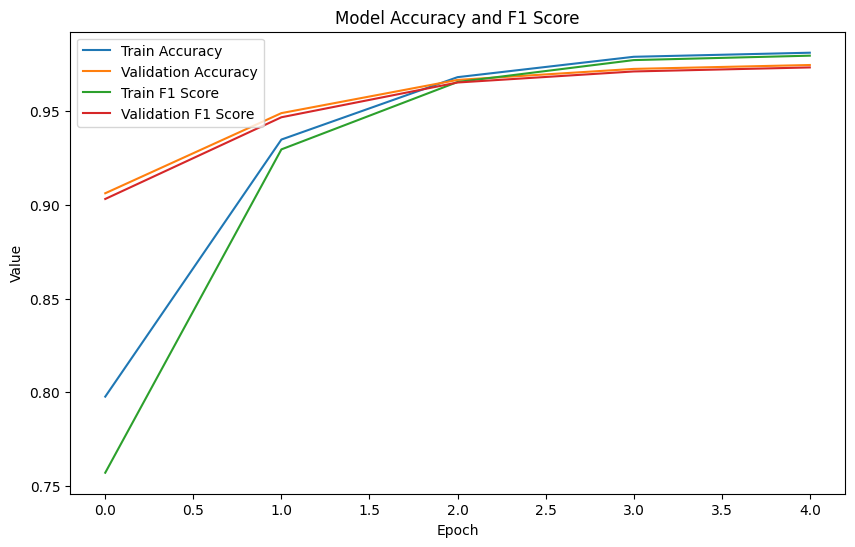

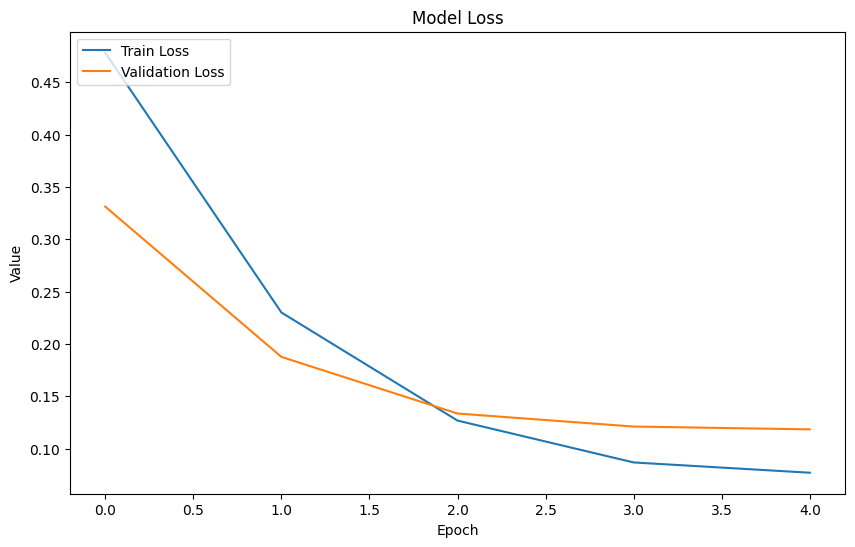

In [42]:
# Plotting the training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model Accuracy and F1 Score')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train F1 Score', 'Validation F1 Score'], loc='upper left')
plt.show()

# Plotting the training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

Saving our model

In [46]:
model.save('my_checkpoint.h5') # saves the model with given name 


Test code

In [47]:
import ipywidgets as widgets
from IPython.display import display

# Define a text input field
input_text = widgets.Textarea(
    value='',
    placeholder='Type your headline here...',
    description='Headline:',
    layout=widgets.Layout(width="auto")
)

# Define a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Define a label to display the prediction result
result_label = widgets.Label()

# Display the input text field, button and the label
display(input_text)
display(predict_button)
display(result_label)

# Function that will be called when the button is clicked
def on_button_clicked(b):
    s1 = input_text.value
    tokenizer.fit_on_texts(s1)
    s1 = tokenizer.texts_to_sequences([s1])
    s1 = pad_sequences(s1, maxlen = max_len, padding = 'pre')
    if model.predict(s1)>= 0.75:
      result_label.value = "Sarcastic headline!"
    else:
      result_label.value = 'Not sarcastic'

# Link the button click event to the function
predict_button.on_click(on_button_clicked)

Textarea(value='', description='Headline:', layout=Layout(width='auto'), placeholder='Type your headline here.…

Button(description='Predict', style=ButtonStyle())

Label(value='')

1/1 [==============================] - 0s 38ms/step
